In [1]:
import pandas as pd                                                                                 # type: ignore
import matplotlib.pyplot as plt                                                                     # type: ignore
from sklearn.model_selection import train_test_split                                                # type: ignore
from sklearn.metrics import mean_absolute_error , mean_squared_error ,median_absolute_error         # type: ignore
from sklearn.linear_model import LinearRegression                                                   # type: ignore

dataset = pd.read_csv('../datasets/stag.csv')
dataset.head(10)

,high_GPA,math_SAT,verb_SAT,comp_GPA,univ_GPA
0,3.45,643,589,3.76,3.52
1,2.78,558,512,2.87,2.91
2,2.52,583,503,2.54,2.40
3,3.67,685,602,3.83,3.47
4,3.24,592,538,3.29,3.47
5,2.10,562,486,2.64,2.37
6,2.82,573,548,2.86,2.40
7,2.36,559,536,2.03,2.24
8,2.42,552,583,2.81,3.02
9,3.51,617,591,3.41,3.32


In [2]:
X = dataset.iloc[:,:1] 
y = dataset.iloc[:, -1]

print(f">> X >> \n{X}\n")
print(f">> y >> \n{y}")

>> X >> 
     high_GPA
0        3.45
1        2.78
2        2.52
3        3.67
4        3.24
..        ...
100      3.76
101      3.49
102      3.07
103      2.19
104      3.46

[105 rows x 1 columns]

>> y >> 
0      3.52
1      2.91
2      2.40
3      3.47
4      3.47
       ... 
100    3.64
101    3.42
102    3.25
103    2.76
104    3.41
Name: univ_GPA, Length: 105, dtype: float64


In [3]:
## Splitting the dataset into the Training set and Test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(f"X_train shape = {X_train.shape} , X_train >> \n{X_train}\n========")
print(f"X_test  shape = {X_test.shape}  , X_test  >> \n{X_test}\n========")
print(f"y_train shape = {y_train.shape} , y_train >> \n{y_train}\n========")
print(f"y_test  shape = {y_test.shape}  , y_test  >> \n{y_test}")

X_train shape = (84, 1) , X_train >> 
     high_GPA
68       3.29
3        3.67
74       3.48
82       3.72
75       3.62
..        ...
101      3.49
67       2.24
64       3.94
47       2.66
44       2.65

[84 rows x 1 columns]
X_test  shape = (21, 1)  , X_test  >> 
     high_GPA
26       2.64
61       3.24
2        2.52
62       3.29
85       3.28
48       3.21
16       3.91
100      3.76
56       3.14
45       2.41
66       3.52
97       3.19
51       2.84
13       3.46
7        2.36
30       3.56
22       2.46
24       3.61
33       4.00
8        2.42
43       2.83
y_train shape = (84,) , y_train >> 
68     3.29
3      3.47
74     3.39
82     3.71
75     3.51
       ... 
101    3.42
67     2.34
64     3.71
47     3.08
44     3.28
Name: univ_GPA, Length: 84, dtype: float64
y_test  shape = (21,)  , y_test  >> 
26     2.40
61     3.38
2      2.40
62     3.41
85     3.48
48     3.01
16     3.73
100    3.64
56     3.40
45     3.19
66     3.37
97     3.28
51     2.40
13     3.71
7      2

In [4]:
## Fitting Simple Linear Regression to the Training set:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

## Calculating Details:
print(f'Linear Regression Train Score : {regressor.score(X_train, y_train)}')
print(f'Linear Regression Test  Score : {regressor.score(X_test, y_test)}\n')

print(f'Linear Regression Coef : \n{regressor.coef_}\n')
print(f'Linear Regression intercept : {regressor.intercept_}\n')

Linear Regression Train Score : 0.6156641228726631
Linear Regression Test  Score : 0.5726696397623814

Linear Regression Coef : 
[0.66758336]

Linear Regression intercept : 1.1144532324766558



In [5]:
## Predicting the Test set results
y_pred = regressor.predict(X_test)
print(f"y_pred >> \n{y_pred[:5]}") 
print(f"y_test >> \n{y_test[:5]}") 

y_pred >> 
[2.87687329 3.27742331 2.79676329 3.31080248 3.30412664]
y_test >> 
26    2.40
61    3.38
2     2.40
62    3.41
85    3.48
Name: univ_GPA, dtype: float64


In [11]:
# Calculating Mean Absolute Error:
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average')   # it can be raw_values
print(f'Mean   Absolute Error Value  : {MAEValue}')
##########################################################
#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average')    # it can be raw_values
print(f'Mean   Squared  Error Value  : {MSEValue}')
##########################################################
#Calculating Median Squared Error
MdSEValue = median_absolute_error(y_test, y_pred)
print(f'Median Squared  Error Value  : {MdSEValue}')

Mean   Absolute Error Value  : 0.242411714035095
Mean   Squared  Error Value  : 0.0928471623423128
Median Squared  Error Value  : 0.1893350279967594


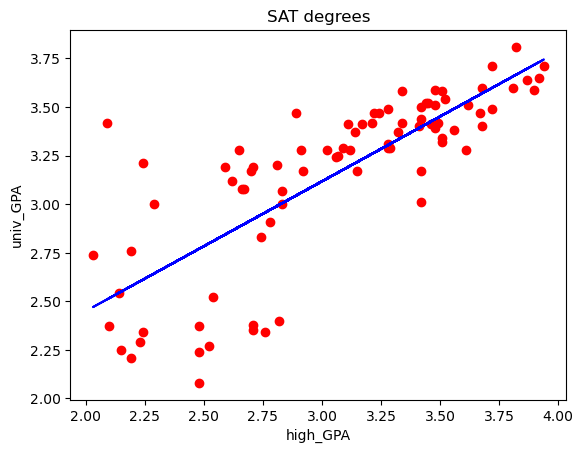

In [7]:
# Visualizing the Training set results:

plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('SAT degrees')
plt.xlabel('high_GPA')
plt.ylabel('univ_GPA')
plt.show()

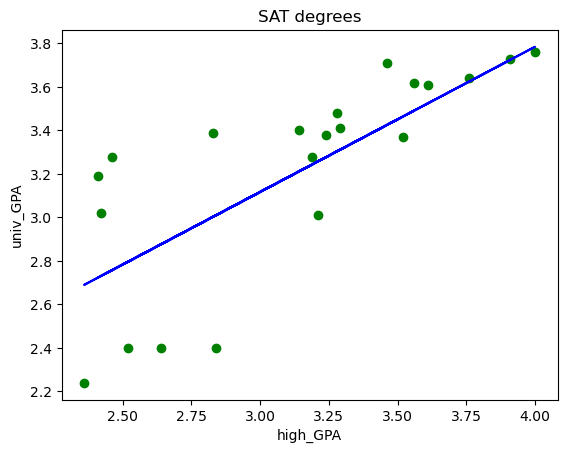

In [8]:
# Visualizing the test set results:

plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.title('SAT degrees')
plt.xlabel('high_GPA')
plt.ylabel('univ_GPA')
plt.show()